In [1]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Reading the data
df = pd.read_csv('world-happiness-report-2021.csv')

In [3]:
# A brief overview
df.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [18]:
# Are any null values?
df.isna().sum().sum()

0

In [19]:
# Are any duplicated values?
df.duplicated().sum()

0

In [4]:
#Dataset's dimensions
df.shape

(149, 20)

In [6]:
#Dataset's basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                149 non-null    object 
 1   Regional indicator                          149 non-null    object 
 2   Ladder score                                149 non-null    float64
 3   Standard error of ladder score              149 non-null    float64
 4   upperwhisker                                149 non-null    float64
 5   lowerwhisker                                149 non-null    float64
 6   Logged GDP per capita                       149 non-null    float64
 7   Social support                              149 non-null    float64
 8   Healthy life expectancy                     149 non-null    float64
 9   Freedom to make life choices                149 non-null    float64
 10  Generosity    

In [4]:
#Taking a subset of the df
df1 = df.iloc[:, [0, 1, 2, 6, 7, 8, 9, 10, 11]]

In [34]:
df1.columns

Index(['Country name', 'Regional indicator', 'Ladder score',
       'Logged GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

In [5]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Ladder score,149.0,5.532839,1.073924,2.523,4.852,5.534,6.255,7.842
Logged GDP per capita,149.0,9.432208,1.158601,6.635,8.541,9.569,10.421,11.647
Social support,149.0,0.814745,0.114889,0.463,0.750,0.832,0.905,0.983
Healthy life expectancy,149.0,64.992799,6.762043,48.478,59.802,66.603,69.600,76.953
Freedom to make life choices,149.0,0.791597,0.113332,0.382,0.718,0.804,0.877,0.970
Generosity,149.0,-0.015134,0.150657,-0.288,-0.126,-0.036,0.079,0.542
Perceptions of corruption,149.0,0.727450,0.179226,0.082,0.667,0.781,0.845,0.939


Text(0.5, 1.0, 'Correlation of GDP with the happiness index')

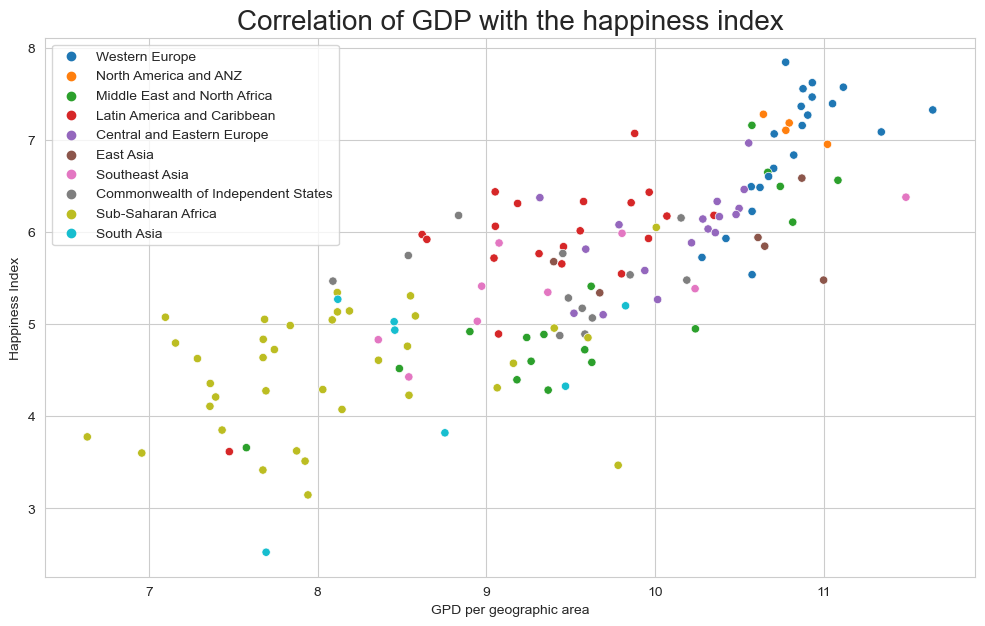

In [9]:
#Relation between happiness and GDP
sns.set_style("whitegrid")
plt.figure(figsize=(12,7))
sns.scatterplot(x=df['Logged GDP per capita'], y=df['Ladder score'], hue=df['Regional indicator'])
plt.legend(loc='best',fontsize=10)
plt.xlabel('GPD per geographic area')
plt.ylabel('Happiness Index')
plt.title('Correlation of GDP with the happiness index',fontsize=20)

    The above scatterplot displays the correlation of GPD with happiness. The dots have different colors since nominate different geographic region. We can extract two important pieces of information.
    1)Regardless of the dots' color all of them have a linear (positive) relationship, with a few outliers.
    2)Olive dots appear to have less GDP & less happiness (Central Africa), red dots (Latin America) appear to have medium to well GDP & happiness, while blue dots (Western Europe) are the most wealthy and happy people. An interesting fact is that green dots have an increased variance, which means that there is a difference of lifestyle through the countries of Middle east.
    

Text(0.5, 1.0, 'Correlation of Healthy life expectancy with Happiness Index')

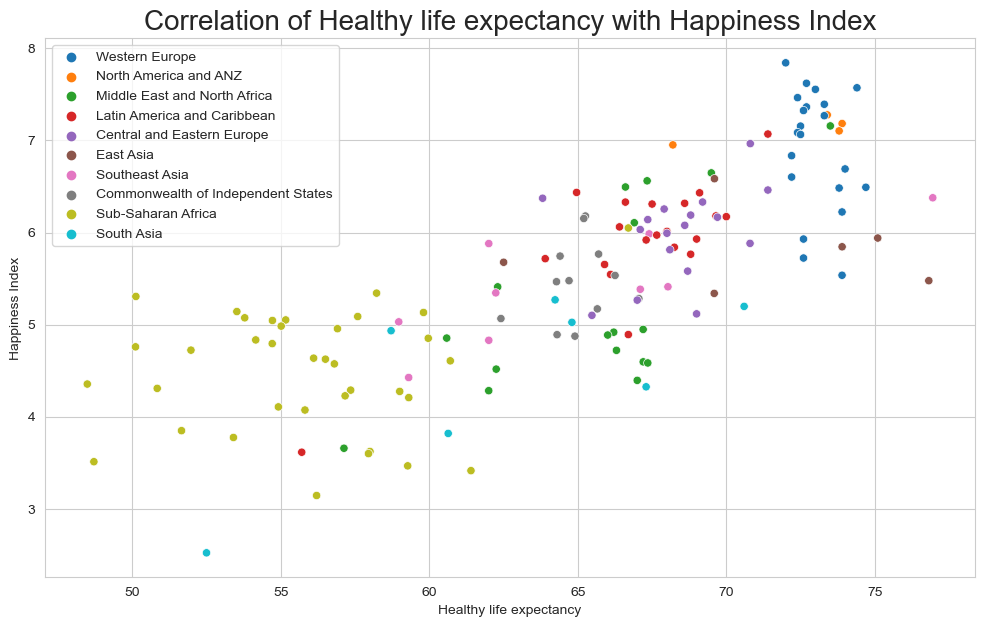

In [5]:
plt.figure(figsize=(12,7))
sns.scatterplot(x=df['Healthy life expectancy'], y=df['Ladder score'], hue=df['Regional indicator'])
plt.legend(loc='best',fontsize=10)
plt.ylabel('Happiness Index')
plt.title('Correlation of Healthy life expectancy with Happiness Index',fontsize=20)

Simillar is the situation in the above scatterplot, with the only difference that same-colored dots seem to be groupby better and the variance between them is small, other than olive and skyblue dots that still have a broden variance between them.

Text(0.5, 1.0, 'Correlation of Freedom to make life choices with Happiness Index')

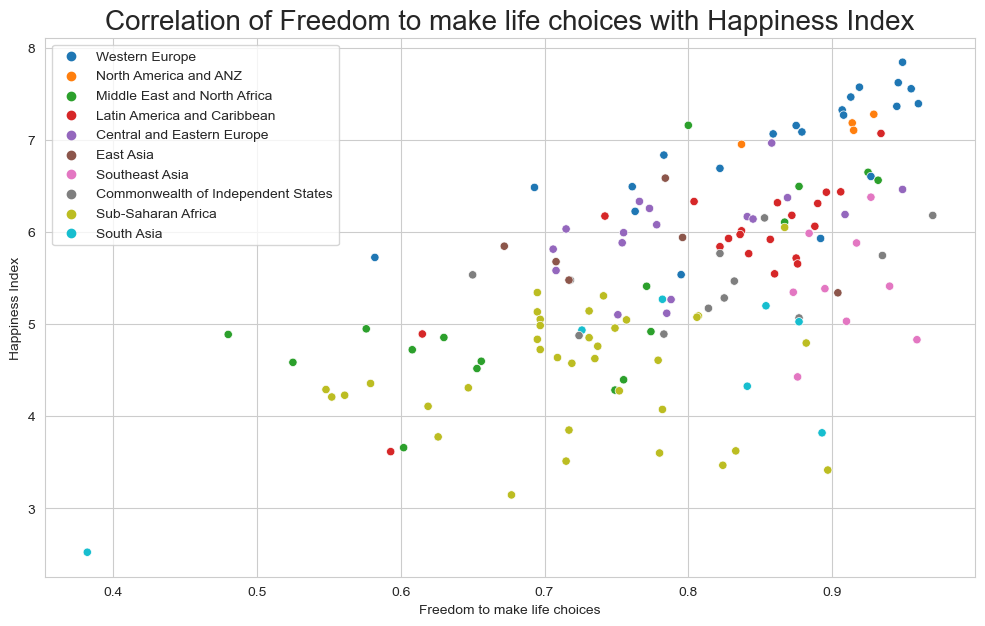

In [6]:
plt.figure(figsize=(12,7))
sns.scatterplot(x=df['Freedom to make life choices'], y=df['Ladder score'], hue=df['Regional indicator'])
plt.legend(loc='best',fontsize=10)
plt.ylabel('Happiness Index')
plt.title('Correlation of Freedom to make life choices with Happiness Index',fontsize=20)

In this scatterplot the picture is different. The linear relationship seems to be distorted, but the space between the dots have been minimazed. There is a skyblue dot outlier, which is not a sampling error but it is extreme behaviour is the result of the political regime governing, so this is why there is little freedom of choices.

Text(0.5, 1.0, 'Correlation of corruption with Happiness')

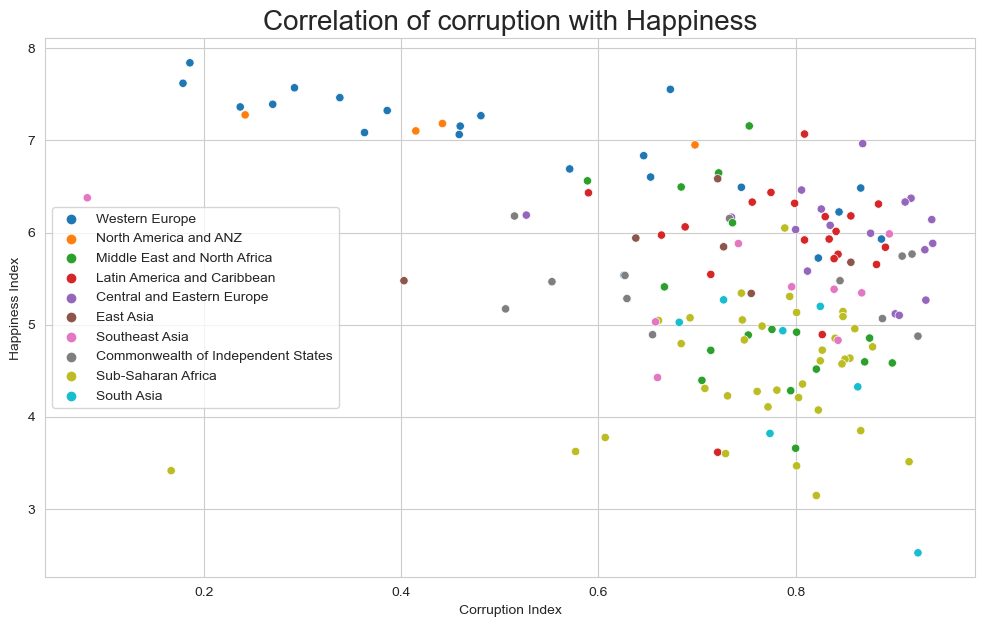

In [7]:
plt.figure(figsize=(12,7))
sns.scatterplot(x=df['Perceptions of corruption'], y=df['Ladder score'], hue=df['Regional indicator'])
plt.legend(loc='best',fontsize=10)
plt.ylabel('Happiness Index')
plt.xlabel('Corruption Index')
plt.title('Correlation of corruption with Happiness',fontsize=20)

In this scatterplot, the picture appears to be messy. At first glance there is no linear relationship. But to be more exact, the dark blue dots & the orange ones have a negative linear correlation among them. All the others seem to follow a less linear pattern individually, but still there is a linearity. Nevertheless, combining all the dots together and judging from their final combination there is no model fitting them good.

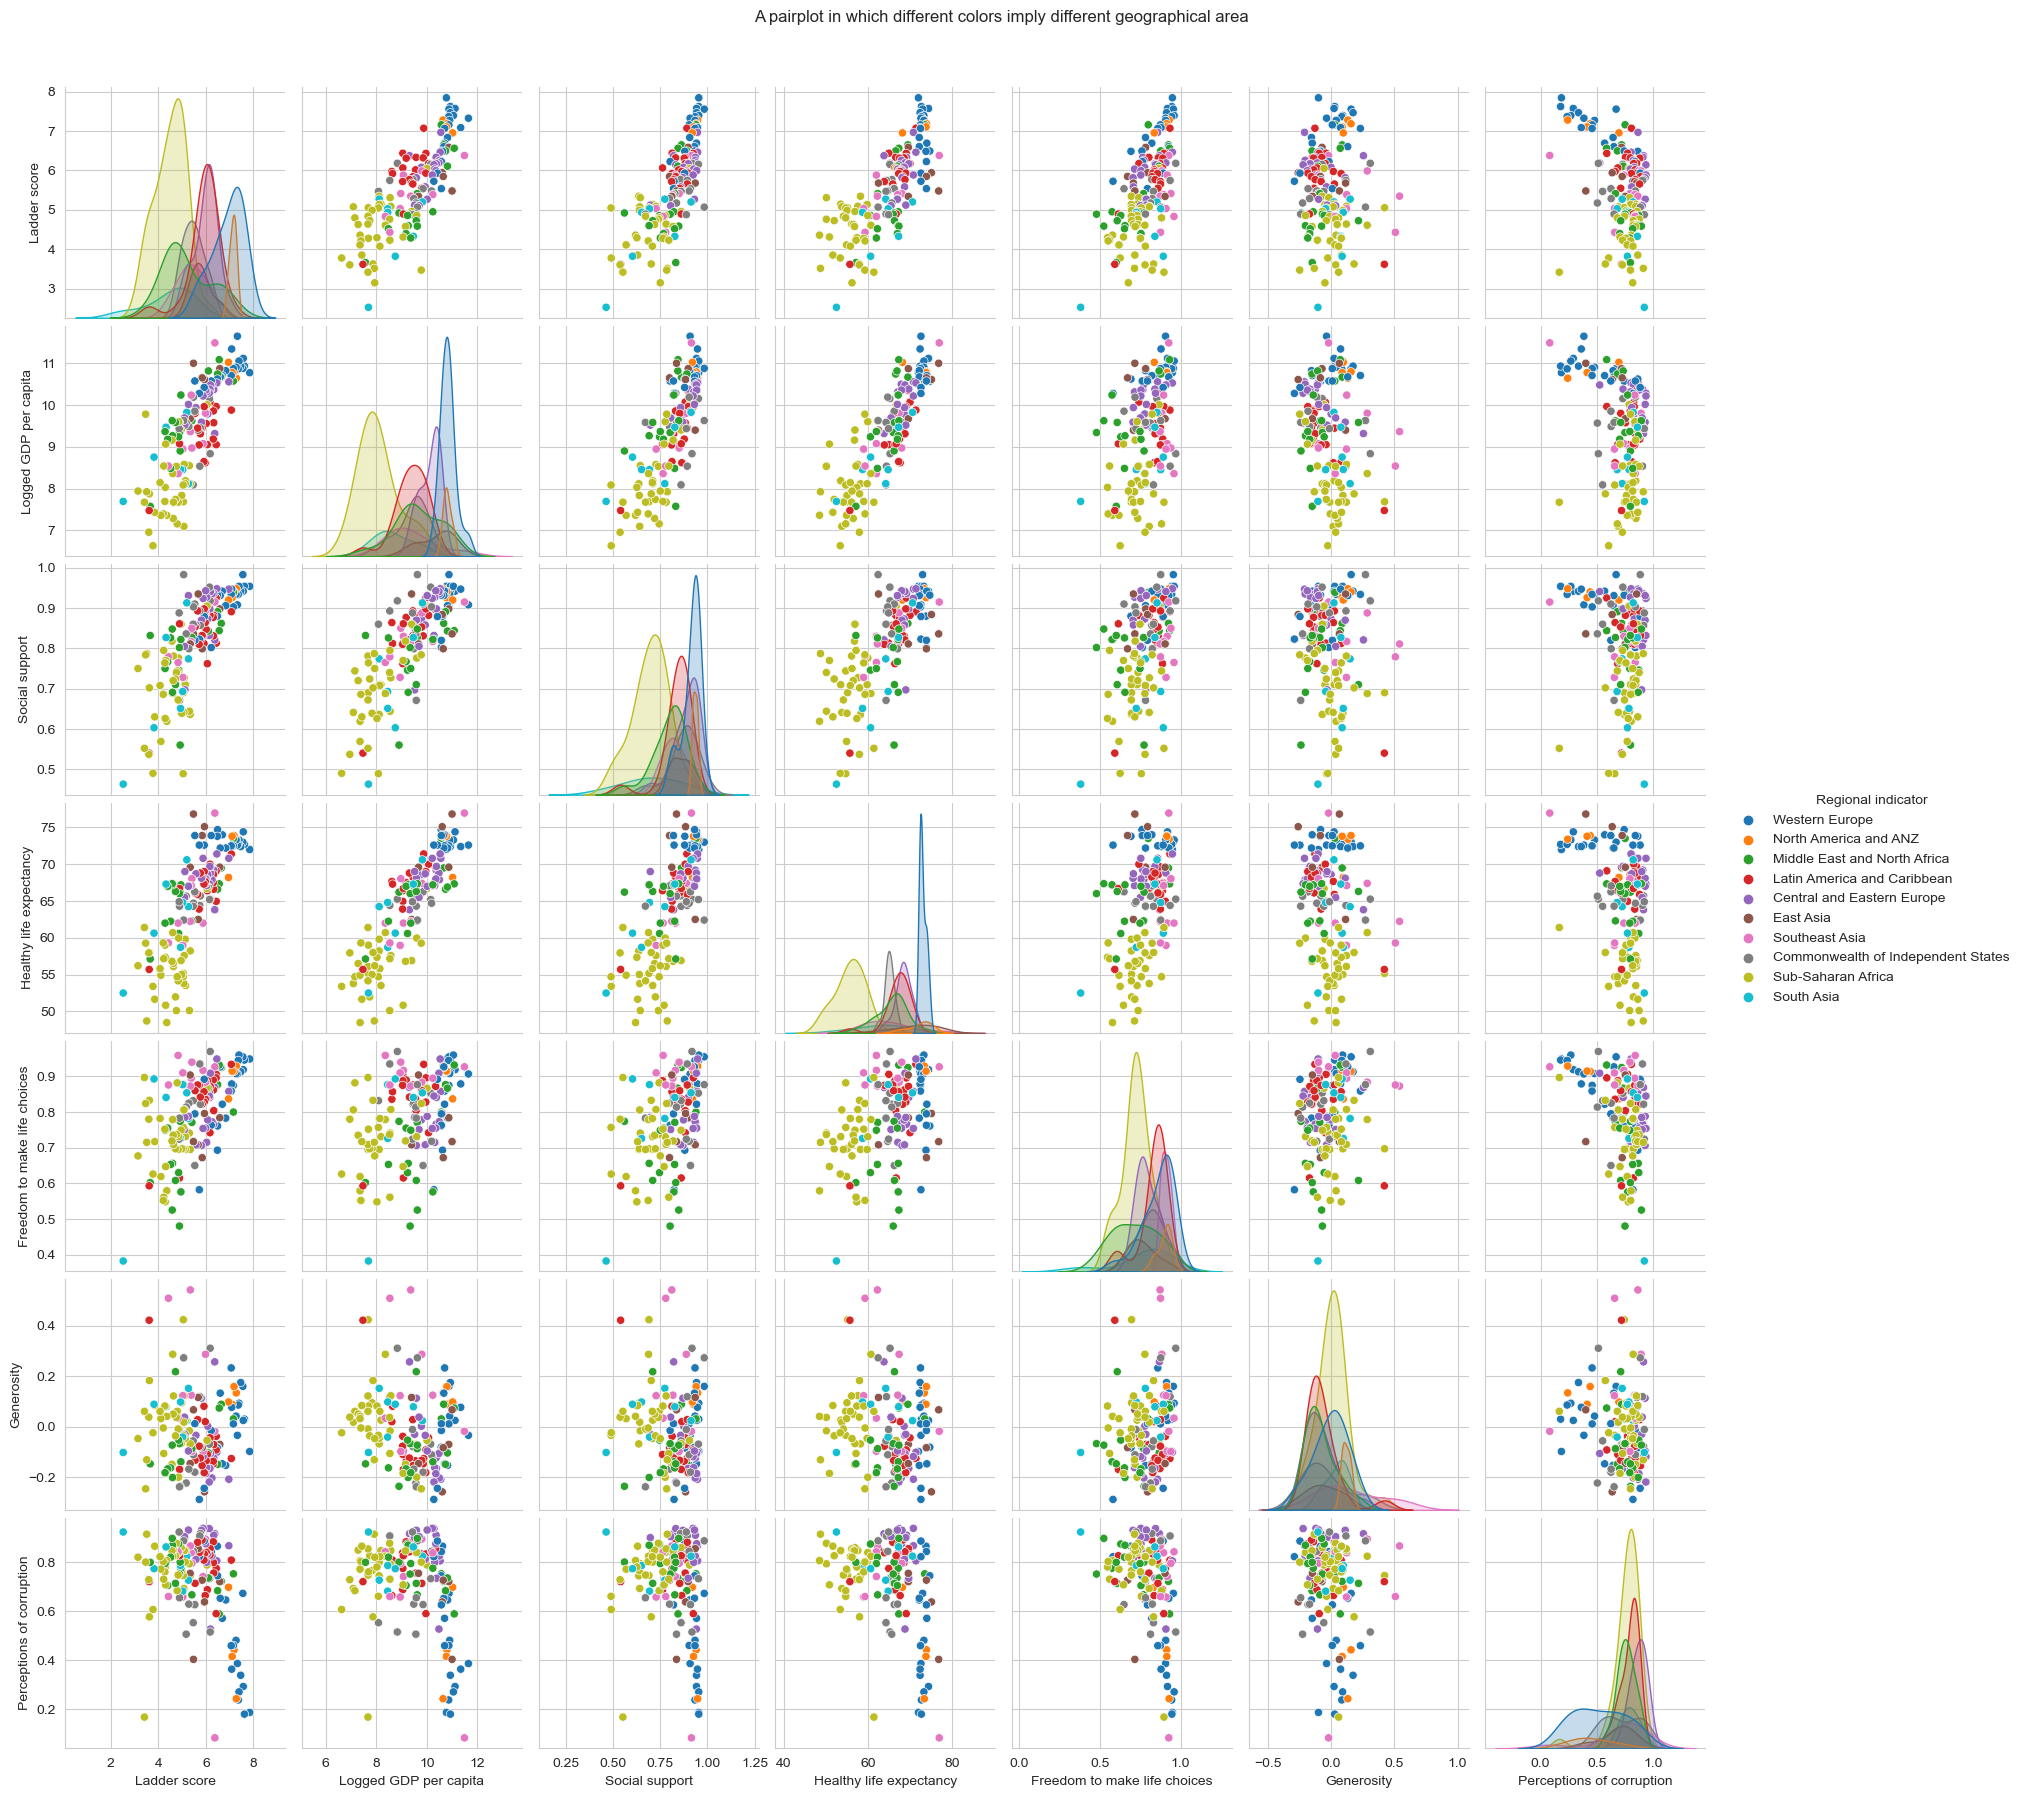

In [14]:
# Create a pair plot
g = sns.pairplot(df1, hue='Regional indicator')
g.fig.suptitle('A pairplot in which different colors imply different geographical area', y=1.03)
plt.show()

In the above pairplot, each scatterplot shows the correlation between two variables. The info we gain is that the Generocity seems to have no correlation at all with the others, while Corruption Index seems to have negative correlation with all the other variables. The other features, for the most part, are positively correlated. In addition, we can understand from the histograms in the diagonial that for every feature the distribution per geographic region is very different. Nevertheless, the skewness seems to be the same regardless of regional area.

<AxesSubplot:>

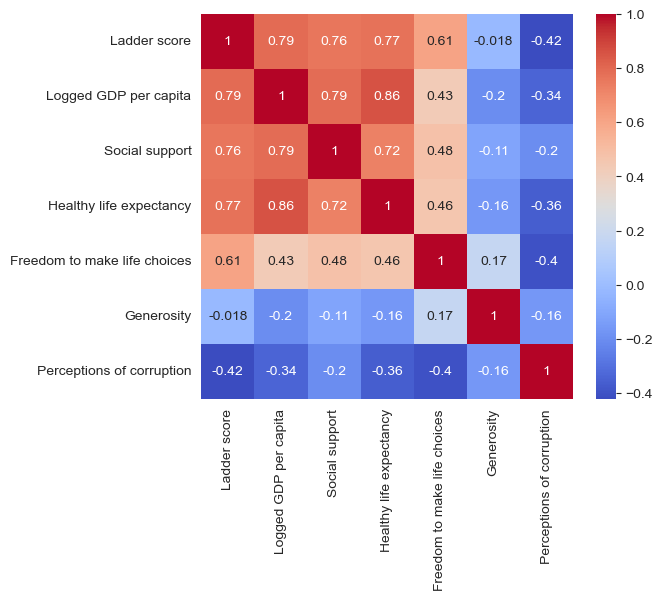

In [52]:
plt.figure(figsize=(6,5))
sns.heatmap(df1.corr(),cmap='coolwarm',annot=True)

The above heatmap is a graphical representation of the correlation per pair. The more red-ish the color is the more positive correlated the pair of features are and the more blue-ish the color is the more negative correlated the pair of features are. So, we ought to refer that GDP is highly (positive) corralated with the health life expectancy and the corruption index is corralated negative with the happiness score.

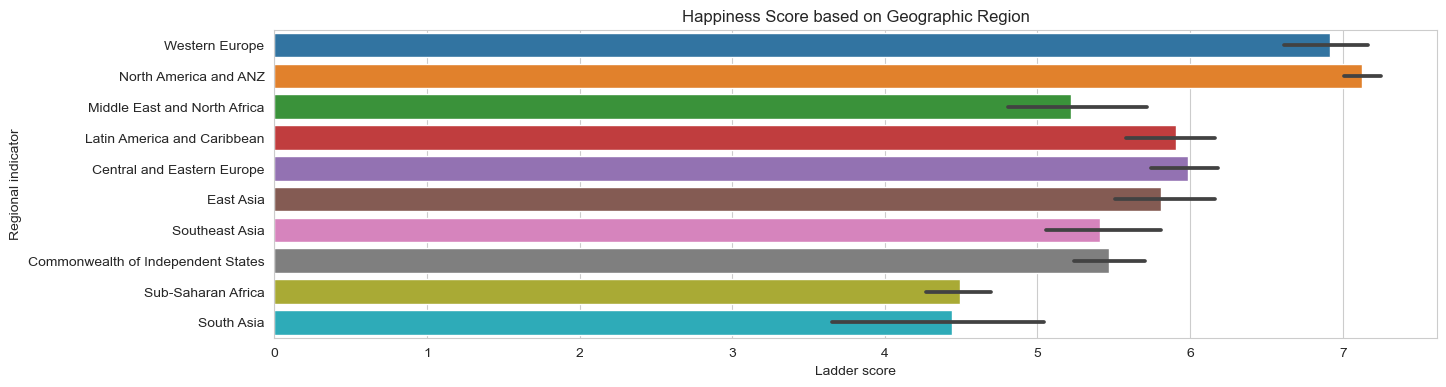

In [59]:
# Regionwise Happiness Score
sns.set_style("whitegrid")
plt.figure(figsize=(15,4))
sns.barplot(data=df1,y=df['Regional indicator'],x=df['Ladder score'])
plt.title('Happiness Score based on Geographic Region')
plt.show()

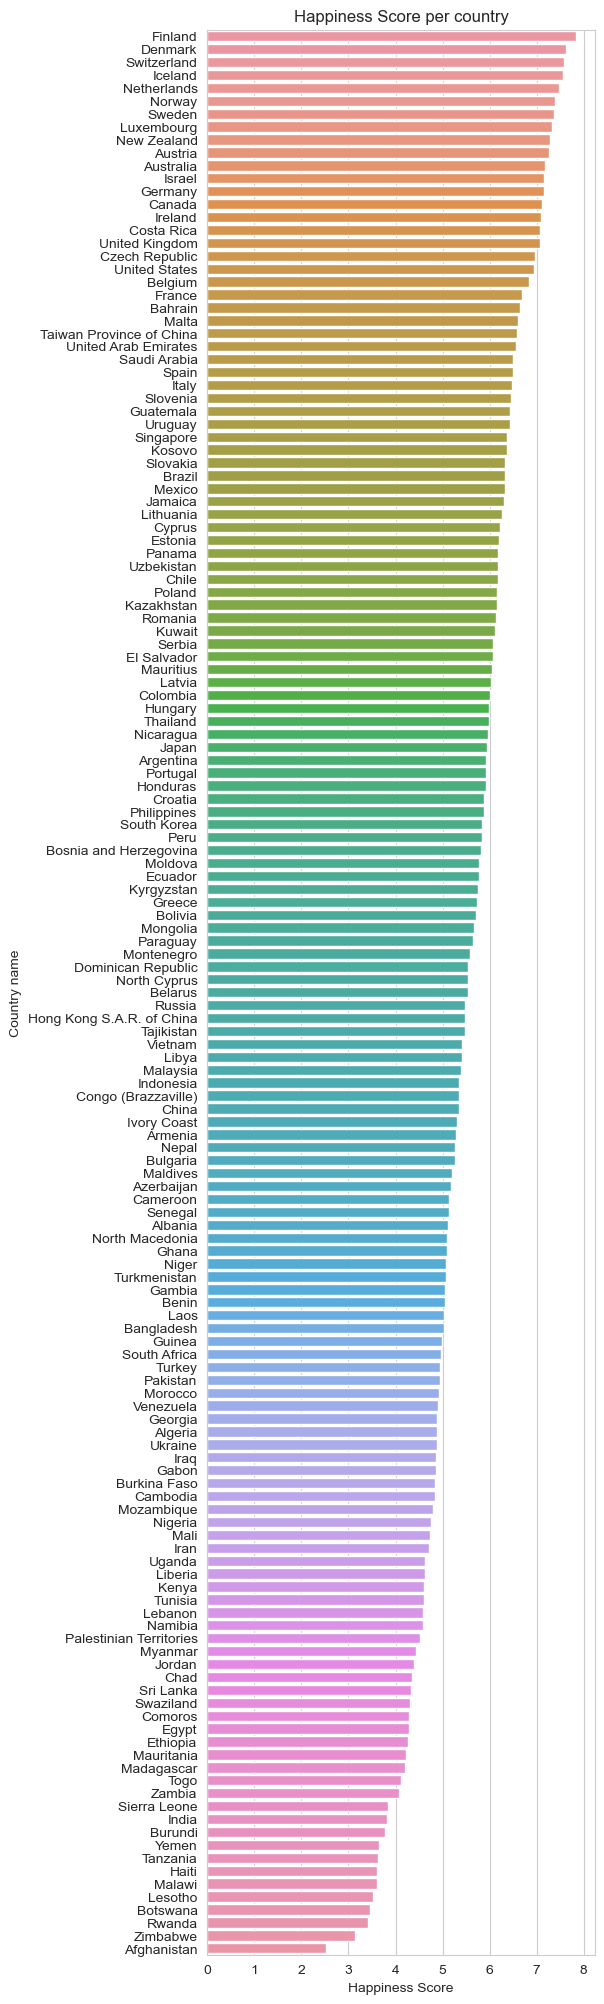

In [6]:
sns.set_style("whitegrid")
plt.figure(figsize=(5,25))
sns.barplot(data=df1,y=df['Country name'],x=df['Ladder score'])
plt.title('Happiness Score per country')
plt.xlabel('Happiness Score')
plt.show()

The above barplot shows all the countries in comparison of their happiness score. They are order from the most to less happy ones.

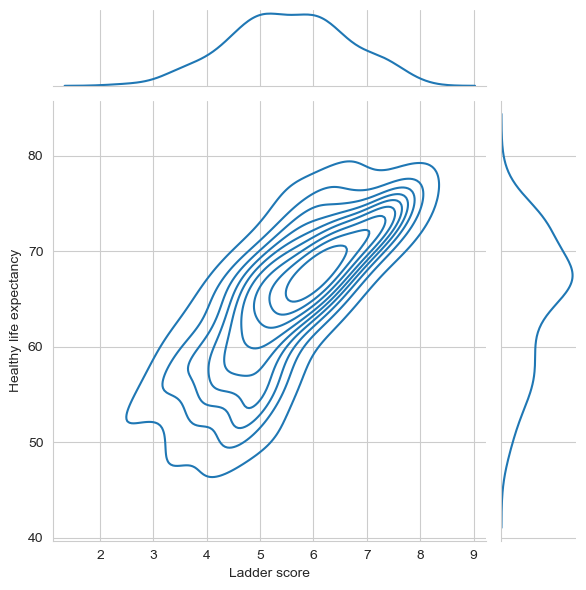

In [8]:
# Join Plots
sns.jointplot(x=df1['Ladder score'], y=df1['Healthy life expectancy'],
              data=df1,kind='kde') 

The above plot is a joint plot with KDE. We observe 3 different geometric structures. At the axis there are the distributions that follow the under the study features. The orizontal distribution referrs to the Ladder score's distribution and the vertical referrs to the Healthy life expectancy. Both of them seem to follow the gaussian distribution approximately. The central diagram represents again the distributions of the features simultaneously. The points where the geometric object is more dense means that the concertation of points in this area is higher.

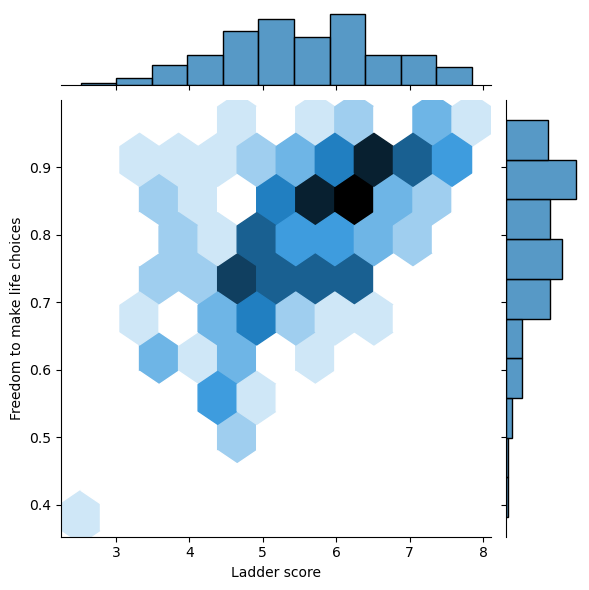

In [8]:
sns.jointplot(x=df1['Ladder score'], y=df1['Freedom to make life choices'],
              data=df1, kind='hex') # king =␣['kde','hex','reg']

This is a hexbin plot, that uses hexagonal bins to represent the density of points in a scatterplot. The color of each hexagon represents the number of points that fall within that bin. Darker blue indicates a higher density of points, while lighter blue indicates a lower density. We can see the overall pattern and trends in the data without being overwhelmed by the individual points.

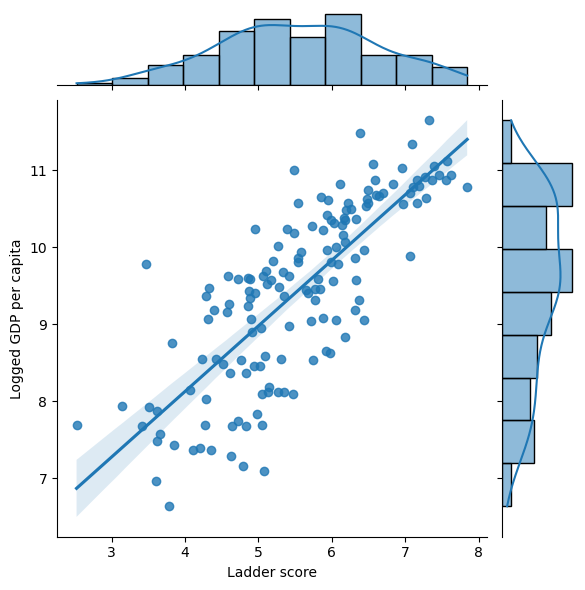

In [9]:
sns.jointplot(x=df1['Ladder score'], y=df1['Logged GDP per capita'],
              data=df1, kind='reg') # king =['kde','hex','reg']

Another type of join plot, the basic one, is a regplot. It shows a linear relationship between the two variables. Also, it shows the histogram plots with KDE indivisually.

In [14]:
# Feature engineering-Create a binary variable
# shows if a country is happy or not
df1['sadness'] = df1['Ladder score'].apply(lambda x: 'Not happy' if x < 6 else 'Happy')

C:\Users\maryk\AppData\Local\Temp\ipykernel_22828\1948103889.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['sadness'] = df1['Ladder score'].apply(lambda x: 'Not happy' if x < 6 else 'Happy')


In [18]:
#How many countries are happy?
df1['sadness'].value_counts()

Not happy    97
Happy        52
Name: sadness, dtype: int64

In [11]:
df1.columns

Index(['Country name', 'Regional indicator', 'Ladder score',
       'Logged GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'sadness'],
      dtype='object')

<AxesSubplot:xlabel='Regional indicator', ylabel='Ladder score'>

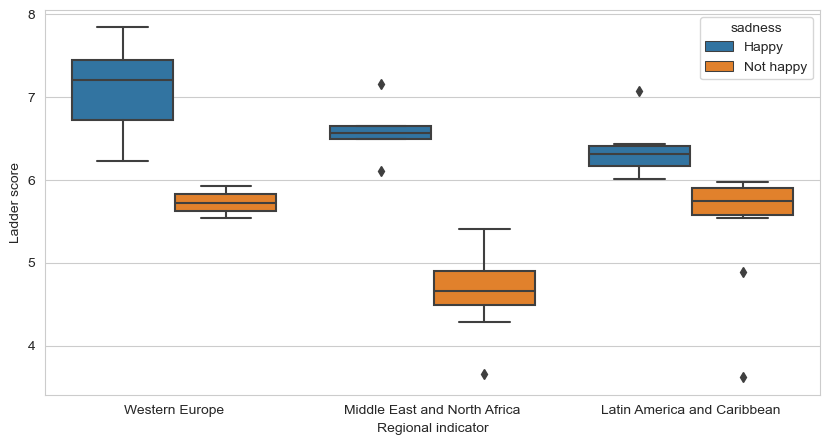

In [16]:
#boxplot
selected_categories = ['Western Europe', 'Latin America and Caribbean', 'Middle East and North Africa']
filt = df1[df1['Regional indicator'].isin(selected_categories)]
plt.figure(figsize=(10,5))
sns.boxplot(x=filt['Regional indicator'], y=filt['Ladder score'], data=filt, hue='sadness')

In the above boxplot, 
1)at a first glance we can observe that they are some outliers looking The Middle East and Latin America. The cause may not is any sampling error, but the heterogeneity in political regimes in these regions. Since the objective of this analysis is to understand the data via EDA and not any forcasting, we avoid to treat them. 
2)Another odd fact is that the 2nd blue boxplot has no whiskers at all, meaning that the most observations are concentrated nearly the median.
3)The height of the box can provide information about the variability of the data. A taller box indicates more variability in the data, while a shorter box indicates less variability. So the 1st blue boxplot has more variability than the other blues. Both of orange boxplots short indicating less variability through the values.
4)Last but not least, we can conclude that the 2nd orange and the Latin America's boxplots are not symmetric and hence they show skewness.

<AxesSubplot:xlabel='Regional indicator', ylabel='Ladder score'>

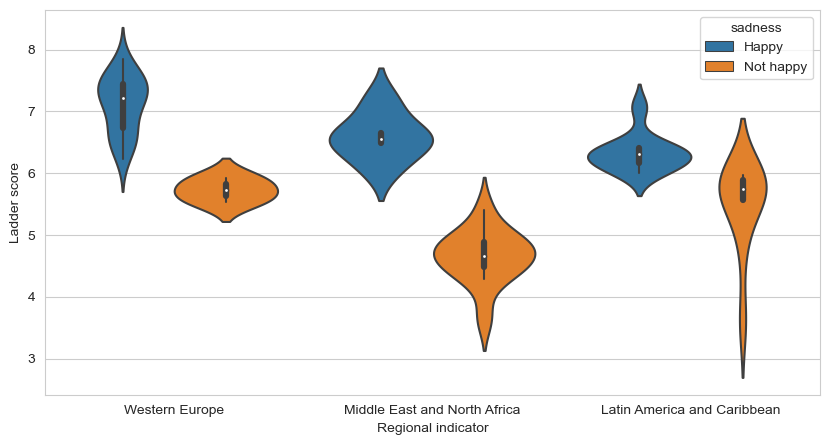

In [17]:
# Violin plot
selected_categories = ['Western Europe', 'Latin America and Caribbean', 'Middle East and North Africa']
filt = df1[df1['Regional indicator'].isin(selected_categories)]
plt.figure(figsize=(10,5))
sns.violinplot(x=filt['Regional indicator'], y=filt['Ladder score'], data=filt, hue='sadness')

The violin plot combines the information provided by the above boxplot with a density plot of the data. Th 1st blue and the last orange are narrow shaped, which means that the data is spread out over a narrow area, in comparison with all the others that are widely-shaped violins.

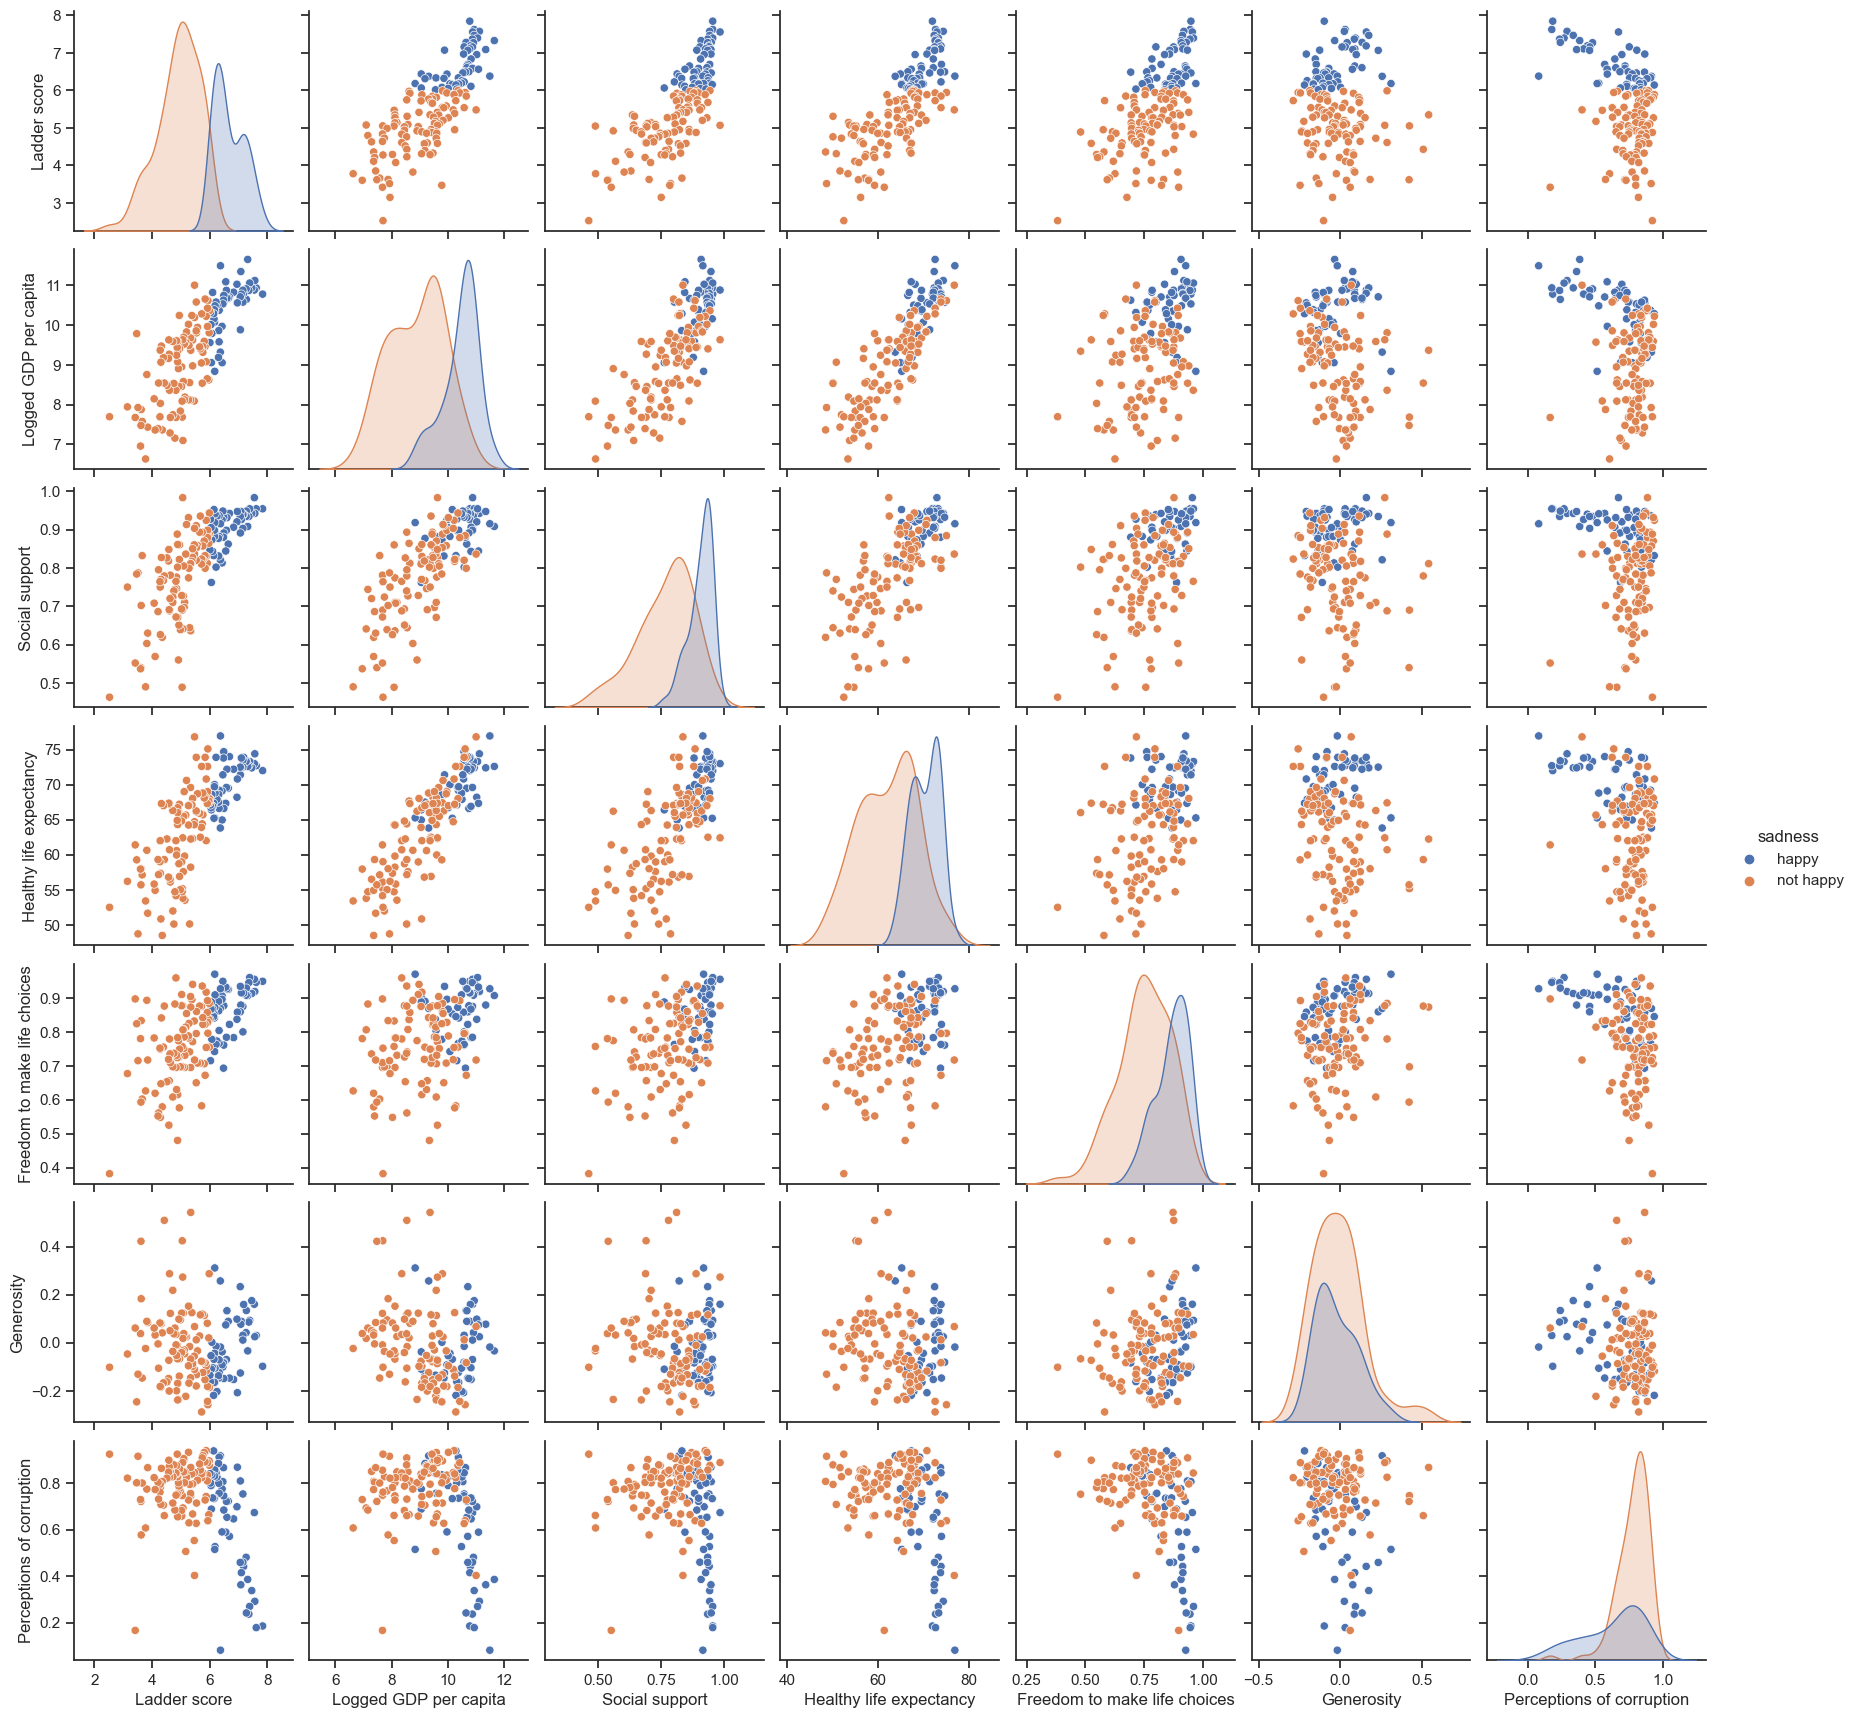

In [50]:
#Pair grid
sns.set(style='ticks')
sns.pairplot(df1, hue='sadness')

In this pair grid, we can see how the features correlated with each other based on the categorical variable sadness, that distinguishes the happy and not happy countries. The happy countries are significantly less. We can observe the distributions of features, and judging from the distribution of corruption there is a significant difference. Again the generosity does not have any correlation with other values. Corruption seems to have a negative correlation with other features and all the others corralated positive.